In [3]:
import midi_utils
import mido

from importlib import reload

reload(midi_utils) # To reflect the changes.

<module 'midi_utils' from '/home/volod/work/personal/markov-chain-gen/midi_utils.py'>

In [ ]:
# Example
path = "./datasets/jazzomat/ArtPepper_Anthropology_FINAL.mid"
midi_file = open_midi_file(path)
assert len(midi_file.tracks) > 0

# From a midi file to note values.
notes, msgs = extract_notes(midi_file)
assert len(notes) > 0

# From note values to a midi file.
midi_file_recov = new_midi_file(notes, [100]*len(notes))
play(midi_file_recov)

In [4]:
note_sequences, raw_dataset  = midi_utils.notes_dataset(
    # "./datasets/jazz_kaggle/", 
    "./datasets/jazzomat/",
)

time_sequences = []
for track in raw_dataset:
    track_times = []
    for msg in track:
        if isinstance(msg, mido.Message):
            time = msg.time
            track_times.append(time)
    time_sequences.append(track_times)

In [7]:
meta_msgs = []
for track in raw_dataset:
    meta_msg = []
    for msg in track:
        if isinstance(msg, mido.MetaMessage):
            meta_msg.append(msg)
    meta_msgs.append(meta_msg)

meta_msgs

[MetaMessage('track_name', name='Melody', time=0),
 MetaMessage('set_tempo', tempo=273972, time=0),
 MetaMessage('key_signature', key='Bb', time=0),
 MetaMessage('time_signature', numerator=4, denominator=4, clocks_per_click=24, notated_32nd_notes_per_beat=8, time=0),
 MetaMessage('end_of_track', time=0),
 [],
 MetaMessage('track_name', name='Melody', time=0),
 MetaMessage('set_tempo', tempo=303030, time=0),
 MetaMessage('key_signature', key='Eb', time=0),
 MetaMessage('time_signature', numerator=4, denominator=4, clocks_per_click=24, notated_32nd_notes_per_beat=8, time=0),
 MetaMessage('end_of_track', time=0),
 [],
 MetaMessage('track_name', name='Melody', time=0),
 MetaMessage('set_tempo', tempo=428571, time=0),
 MetaMessage('key_signature', key='F', time=0),
 MetaMessage('time_signature', numerator=4, denominator=4, clocks_per_click=24, notated_32nd_notes_per_beat=8, time=0),
 MetaMessage('end_of_track', time=0),
 [],
 MetaMessage('track_name', name='Melody', time=0),
 MetaMessage('

In [22]:
# Explore data.
import mido
import numpy as np

times = np.array([])
times_map = {}

for track in raw_dataset:
    t = [] 
    for msg in track:
        if isinstance(msg, mido.Message):
            time_sec = msg.time / 1000
            times_map[time_sec] = times_map.get(time_sec, 0) + 1
            t.append(time_sec)
    times = np.concatenate((times, t))

assert len(times) > 0
assert len(times_map) > 0

print(f"Times\nMean: {times.mean()}\nMin/Max: {times.min()}/{times.max()}")

print(len(times_map))
times_map = {key: value for key, value in times_map.items() if value > 10}
print(len(times_map))

Times
Mean: 0.12453672805822133
Min/Max: 0.0/5716.8
12937
2863


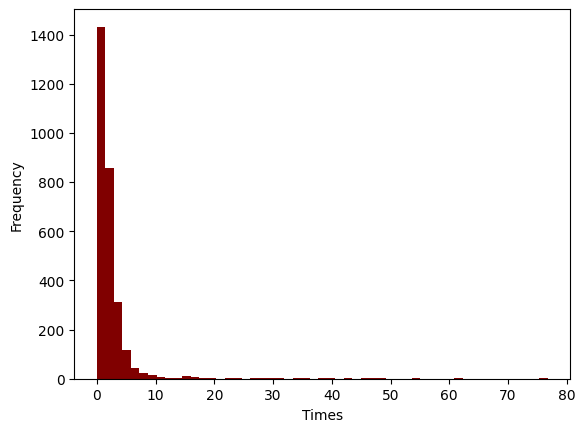

In [24]:
import matplotlib.pyplot as plt
import math
from typing import List

def plot_times(unique_times: List[int]):
    # time_frequency = list(timesMap.values())
    n_bins = int(math.sqrt(len(unique_times)))

    plt.hist(unique_times, bins=n_bins, color ='maroon')

    plt.xlabel('Times')
    plt.ylabel('Frequency')

    # Show plot
    plt.show()


unique_times = list(times_map.keys())
plot_times(unique_times)

In [25]:
# Example
import markovify

time_model = markovify.Chain(meta_msgs, state_size=10)
note_model = markovify.Chain(note_sequences, state_size=10)
# model = model.compile()

notes, times = None, None
while True:
    notes = note_model.walk()
    times = time_model.walk()
    n = min(len(notes), len(times))
    if n > 800:
        notes = notes[:n]
        times = times[:n]
        break 

print(len(notes), len(times))

midi_file = new_midi_file(notes[:n], times[:n])

play(midi_file)

5317 5317


KeyboardInterrupt: 

In [ ]:
# Example
import markovify

notes_and_times = []
for i in range(len(note_sequences)):
    notes_and_times.append([f"{note}_{time}" for note, time in zip(note_sequences[i], meta_msgs[i])])

model = markovify.Chain(notes_and_times, state_size=5)
# model = model.compile()

res = None
while True:
    res = model.walk()
    if len(res) > 800:
        break 

# song = map(lambda v: v.split('_'), song)
notes, times = [], []
for v in res:
    note, time = tuple(v.split('_')[:2])
    notes.append(int(note))
    times.append(int(time))

#print(notes[:10], times[:10])
midi_file = new_midi_file(notes, times)

play(midi_file)